### 03 BOOK
- ADR 을 구해본다.
  (주식투자 궁금중 300문 300답을 260 Page)


#### 1. 데이터 로드를 한다.
- DF를 어떻게 잘 만들어 본다.

In [51]:
import pandas as pd
import pyupbit
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep

#load data
def load_prev_price(tickers, nr):
    data = {}
    
    for coin in tickers:
        sleep(0.1)
        
        ohlcv = pyupbit.get_ohlcv(coin, count=nr)
        if ohlcv is not None:
            data[coin] = ohlcv
        else:
            print(coin)
        
    return data

In [261]:
period = 40
tickers = pyupbit.get_tickers(fiat="KRW")
data    = load_prev_price(tickers, period)

data["KRW-IOTA"].tail()

,open,high,low,close,volume
2021-04-30 09:00:00,2645.0,2675.0,2530.0,2660.0,2.889273e+06
2021-05-01 09:00:00,2660.0,2740.0,2555.0,2705.0,2.232833e+06
2021-05-02 09:00:00,2710.0,2715.0,2540.0,2620.0,2.480629e+06
2021-05-03 09:00:00,2625.0,2680.0,2600.0,2645.0,2.655379e+06
2021-05-04 09:00:00,2645.0,2645.0,2470.0,2505.0,1.495531e+06


#### 2. DATA를 가공합니다.
- (CLOSE - OPEN)을 계산합니다

In [259]:
price_change ={}

for ticker in data:
    price_change[ticker] = data[ticker]["close"] - data[ticker]["open"]
    
df = pd.DataFrame.from_dict(price_change, orient='index')

#### 2.1 ADR을 계산합니다
- MAX을 300으로 설정함

In [265]:
adr = {}

for date in df.columns:
    con =  df[date] > 0
    adv =  df[date][con].count()
    con =  df[date] < 0
    dec =  df[date][con].count()
    
    adr[date] = min(adv* 100 /max(dec, 1), 300)
#     adr[date] = adv* 100 /max(dec, 1)
    
adr = pd.DataFrame.from_dict(adr, orient='index')  

- HISTOGRAM

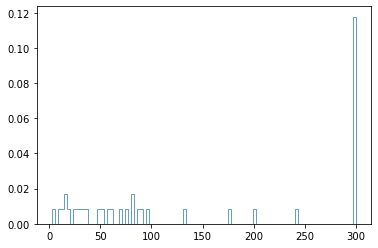

In [266]:
plt.hist(adr[0].values, bins=100, density=True, alpha=0.7, histtype='step')
plt.show()

- PLOT

0.425
0.425


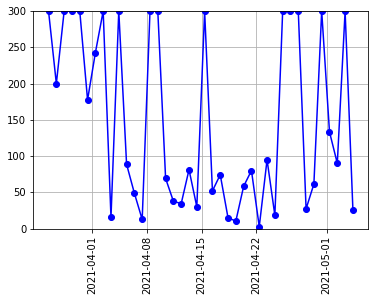

In [236]:
con0 =  adr[0] > 150
cnt0 = adr[0][con0].count()
print(cnt0/period)

con0 =  adr[0] < 75
cnt0 = adr[0][con0].count()
print(cnt0/period)

adr_mean = adr.rolling(1, min_periods=1).mean()
plt.plot(adr_mean, "bo-")
plt.grid()
plt.xticks(rotation=90)
plt.ylim(0,300)
plt.show()


IOTA

In [213]:
con0 =  adr[0] >125
cnt0 = adr[0][con0].count()

con1 = (data["KRW-IOTA"]["close"] - data["KRW-IOTA"]["open"]) > 0
con2 = con0 &con1

cnt1 = data["KRW-IOTA"]["close"][con2].count()
print(cnt0/period, cnt1/cnt0)

0.45 0.8888888888888888
